# Newtons metode

En ulempe med fikspunktiterasjon er at når den konvergerer, vil det typisk skje nokså langsomt.
Dette kan forbedres dersom vi har mer informasjon om funksjonen $f$ vi vil finne roten til; i fikspunktiterasjonen bruker vi kun $f$ selv til å finne en funksjon $g$ å iterere med, $x_{n+1} = g(x_n)$.

Dersom vi kjenner den deriverte $f'$, vet vi mer om hvordan $f$ oppfører seg, og dette kan vi bruke til å finne en mer effektiv iterativ metode.
Idéen er som følger: gitt en gjetning $x_n$ som ikke er roten selv, $f(x_n) \neq 0$, kan vi finne tangenten til funksjonen $f$ i dette punktet, $y = y(x)$ gitt ved
$$ y = f(x_n) + f'(x_n)(x-x_n). \tag{1} $$
Dersom denne tangenten ikke er horisontal, det vil si at vi ikke har $y(x) \equiv f(x_n) \iff f'(x_n)=0$, så vil tangenten skjære $x$-aksen i ett punkt hvor $y=0$.
Vi antar derfor $f'(x_n) \neq 0$ slik at dette er tilfelle.
Dersom $x_n$ er nær nok roten $r$ er det rimelig at dette skjæringspunktet er en bedre tilnærming av $r$ enn $x_n$, så vi kan definere dette som vårt neste iterat: vi setter $y=0$ i ligning (1), løser for x og finner $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}. \tag{2} $$
Dette er Newtons metode, og vi kan merke oss at vi kan se på denne som en fikspunktmetode med funksjonen $g$ gitt av $$g(x) = x - \frac{f(x)}{f'(x)},$$
som tydelig oppfyller $r = g(r)$ dersom $f(r) = 0$ og $f'(r) \neq 0$.

Dersom vi antar at $f$ er to ganger kontinuerlig deriverbar ser vi også at
$$ g'(x) = \frac{f''(x) f(x)}{(f'(x))^2}, $$
som viser at dersom $r$ er en rot for $f$, så er Newtons metode lokalt konvergent mot $r$ dersom $f'(r)\neq 0$, siden $g'(r) = 0$.



**Eksempel 1**:
La oss se hvordan Newtons metode sammenligner seg med fikspunktiterasjonen (med valget av $g$ som fungerte) i et tidligere eksempel, nemlig for $f(x) = x^3+x-1$ på intervallet $[0,1]$.
Her ser vi at $f'(x) = 1 + 3x^2 \ge 1$, så det er ingen fare for å dele på null.

Text(0.5, 1.0, 'Newtons metode ($f$ og tangentlinjer)')

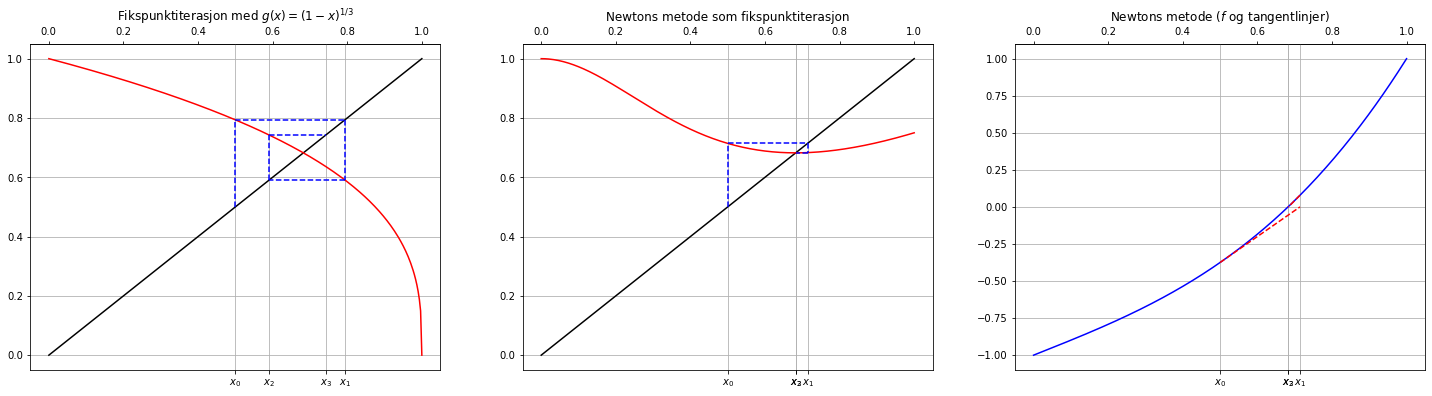

In [237]:
from matplotlib import pyplot as plt # importer plottefunksjonalitet
import numpy as np # importer matematiske funksjoner etc.
%matplotlib inline

def fixpoint(g,x0,tol,maxIt):
    # implementasjon av fikspunktalgoritmen for en funksjon g,
    # startgjett x0, feiltoleranse tol and maksimalt antall iterasjoner maxIt.
    # Returnerer siste iterat, feilen and antall iterasjoner
    x_prev = x0
    x_next = g(x_prev)
    It = 1
    err = np.abs(x_next-x_prev)
    while err > tol and It < maxIt:
        x_prev = x_next
        x_next = g(x_next)
        err = np.abs(x_next-x_prev)
        It += 1
    return x_next, err, It

def f1(x):
    return x**3 +x -1

def g1(x): # fikspunktiterasjonen fra tidligere eksempel
    return (1-x)**(1/3)

def g2(x): # Newtons metode
    return x - f1(x)/(1+3*x**2)

xs = np.linspace(0,1,301)

x0 = 0.5 # Startgjett, prøv å endre dette
N = 3 # Antall iterasjoner
X = np.zeros([2,N+1])
X[0,0] = x0
X[1,0] = x0

fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,6))
ax1.plot(xs,xs,'k')
ax1.plot(xs,g1(xs),'r')
ax1.grid(True)

ax2.plot(xs,xs,'k')
ax2.plot(xs,g2(xs),'r')
ax2.grid(True)

#ax3.plot(xs,0*xs,'k')
ax3.plot(xs,f1(xs),'b')
ax3.grid(True)

for k in range(1,N+1):
    X[0,k] = fixpoint(g1,X[0,k-1],np.Inf,1)[0]
    X[1,k] = fixpoint(g2,X[1,k-1],np.Inf,1)[0]
    
    ax1.plot([X[0,k-1],X[0,k-1]],[X[0,k-1],X[0,k]],'b--')
    ax1.plot([X[0,k-1],X[0,k]],[X[0,k],X[0,k]],'b--')
    
    ax2.plot([X[1,k-1],X[1,k-1]],[X[1,k-1],X[1,k]],'b--')
    ax2.plot([X[1,k-1],X[1,k]],[X[1,k],X[1,k]],'b--')
    
    ax3.plot([X[1,k-1],X[1,k]],[f1(X[1,k-1]),0],'r--')
    #ax3.plot([X[1,k],X[1,k]],[0,f1(X[1,k])],'b--')

ax1.set_xticks(X[0,:])
xlabels1 = ['$x_{:d}$'.format(k) for k in range(0,N+1)]
ax1.set_xticklabels(xlabels1)
ax1.secondary_xaxis('top')
ax1.set_title('Fikspunktiterasjon med $g(x) = (1-x)^{1/3}$')

ax2.set_xticks(X[1,:])
xlabels2 = ['$x_{:d}$'.format(k) for k in range(0,N+1)]
ax2.set_xticklabels(xlabels2)
ax2.secondary_xaxis('top')
ax2.set_title('Newtons metode som fikspunktiterasjon')

ax3.set_xticks(X[1,:])
ax3.set_xticklabels(xlabels2)
ax3.secondary_xaxis('top')
ax3.set_title('Newtons metode ($f$ og tangentlinjer)')

Ovenfor har vi laget fikspunktplott for $g(x) = (1-x)^{1/3}$ og $g$ tilsvarende Newtons metode, i tillegg til et plott av $f$ og tangentlinjene tilhørende Newtons metode.
Legg merke til hvor mye raskere Newtons metode tilnærmer roten $r$, allerede ved andre iterasjon er man typisk kommet veldig nær, uavhengig av startgjetning.

Grunnen til at Newtons metode er raskere er at for $f'(r)\neq0$ vil feilen avta kvadratisk og ikke lineært som er typisk for fikspunktiterasjoner.

> **Definisjon 1**: La $e_i$ være feilen etter $i$ steg med en iterativ metode. Dersom
$$ \lim\limits_{i\to\infty} \frac{e_{i+1}}{e_i} = S, \quad \text{hvor} \quad 0 < S < 1, \tag{3} $$
sier vi at metoden er lineært convergent med rate $S$.

Dette betyr at for store nok verdier av $i$ vil neste feil $e_{i+1}$ være omtrent lik $S e_i$.

> **Definisjon 2**: La $e_i$ være feilen etter $i$ steg med en iterativ metode. Vi sier at iterasjonen *konvergerer kvadratisk* dersom
$$ \lim\limits_{i\to\infty} \frac{e_{i+1}}{e_i^2} = M < \infty.  $$

Uttrykket ovenfor forteller oss at for store nok verdier av $i$ vil neste feil $e_{i+1}$ være omtrent lik $M e_i^2$.

Feilen $e_i$ er gitt ved avviket $e_i = |x_i-r|$, hvor $r$ er roten vi er ute etter.
Siden $r$ typisk er ukjent vil det være vanskelig å plotte denne feilen.
Et godt alternativ kan da være å se på avviket mellom forrige og neste iterat, $|x_{i+1}-x_i|$.
For en fikspunktmetode vil dette tilsvare $|g(x_i)-x_i|$, som også er et mål på hvor nær vi er fikspunktet $r = g(r)$.

La oss sammenligne hvordan feilen avtar når vi utfører $N$ iterasjoner for de to metodene i de forrige figurene.

array([0.69056878, 0.74688645, 0.70009939, 0.73067314, 0.70711365,
       0.72318094, 0.71124469, 0.71957655, 0.71349853])

0.7158713471616589

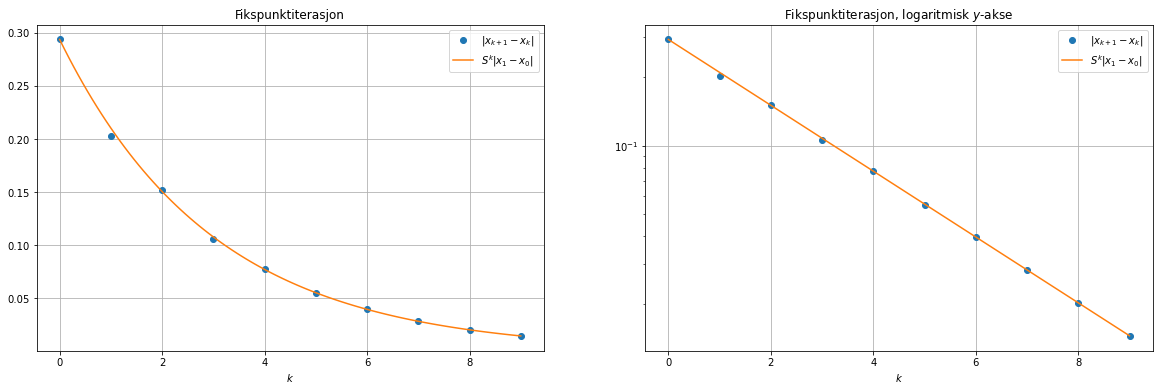

In [238]:
#r = (np.cbrt(3*np.sqrt(93)+27)-np.cbrt(3*np.sqrt(93)-27))*2**(2/3)/6 #bruke denne rota eller ikke?
N = 10 # >= 4

e = np.zeros([N,2])
xprev1 = x0
xprev2 = x0
for k in range(0,N):
    xprev1, e[k,0] = fixpoint(g1,xprev1,np.Inf,1)[0:2]
    xprev2, e[k,1] = fixpoint(g2,xprev2,np.Inf,1)[0:2]

display(e[1:N,0]/e[0:N-1,0])
S = np.average(e[1:N,0]/e[0:N-1,0])
display(S)
y1 = np.linspace(0,9,100)
fig2, (ax4,ax5) = plt.subplots(1,2,figsize=(20,6))
ax4.plot(e[:,0],'o')
ax4.plot(y1,e[0,0]*S**y1)
ax4.set_title('Fikspunktiterasjon')
ax4.legend(['$|x_{k+1}-x_{k}|$','$S^{k}|x_1-x_0|$'])
ax4.set_xlabel('$k$')
ax4.grid(True)

ax5.semilogy(e[:,0],'o')
ax5.plot(y,e[0,0]*np.exp(y*np.log(S)))
ax5.set_title('Fikspunktiterasjon, logaritmisk $y$-akse')
ax5.legend(['$|x_{k+1}-x_{k}|$','$S^{k}|x_1-x_0|$'])
ax5.set_xlabel('$k$')
ax5.grid(True)

Som en tilnærming til raten $S$ har vi tatt gjennomsnittsverdien av $e_{i+1}/e_{i}$ for $i = 0,...,N-1$ og i stedet brukt denne verdien.
I plottet til venstre har vi plottet $|x_{k+1}-x_k|$ for hver iterasjon, og vi ser at disse følger kurven $S^k |x_1-x_0|$ veldig godt.

Merk at dersom man har en feil $e_k$ som oppfyller den geometriske sammenhengen $e_{k} = S^k e_0$, kan vi ta logaritmen av begge sider og i stedet få $\log_{10}(e_k) = k \log_{10}(S) + \log_{10}(e_0)$.
Altså er logaritmen av feilen en lineær funksjon av $k$.
Siden $S^k$ raskt blir veldig liten for $0 < S < 1$ og store verdier av $k$, er det ofte nyttig å skalere $y$-aksen i et feilplott logaritmisk istedenfor lineært:
det vil si, når vi går én enhet langs $x$-aksen går vi fra $x=k$ til $x=k+1$, men langs $y$-aksen går vi i stedet fra $y = 10^{k}$ til $y = 10^{k+1}$.
Dette er hva vi har gjort i plottet til høyre, hvor vi har brukt kommandoen $\texttt{pyplot.semilogy}()$ istedenfor $\texttt{pyplot.plot}()$, og vi ser at feilene nå ligger mer eller mindre langs en rett linje.

For fikspunktiterasjonen ovenfor avtar ikke feilene så raskt at de blir vanskelige å skille frahverandre i normalt plott, men for Newtons metode vil vi se hvorfor det logaritmiske plottet er nyttig.

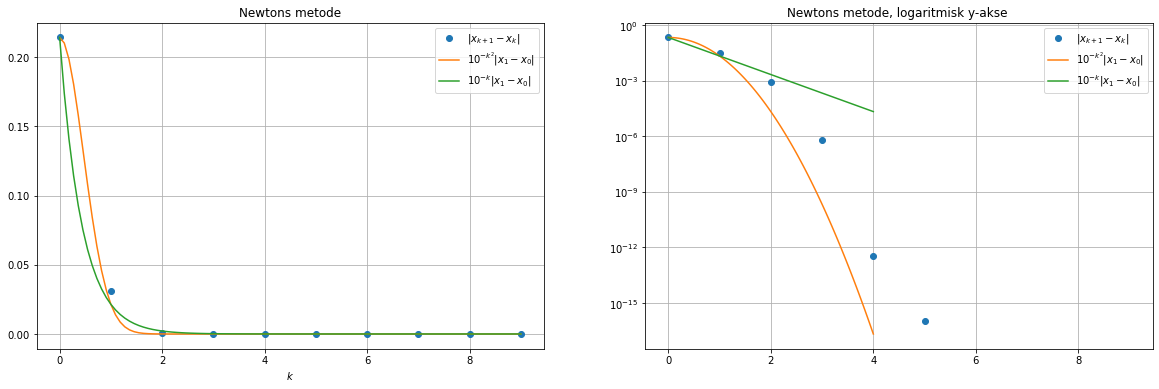

In [243]:
y2 = np.linspace(0,4,100)

fig3, (ax6,ax7) = plt.subplots(1,2,figsize=(20,6))
ax6.plot(e[:,1],'o')
ax6.plot(y1,e[0,1]*10**(-y1**2))
ax6.plot(y1,e[0,1]*10**(-y1))
ax6.set_title('Newtons metode')
ax6.legend(['$|x_{k+1}-x_{k}|$','$10^{-k^2}|x_1-x_0|$','$10^{-k}|x_1-x_0|$'])
ax6.set_xlabel('$k$')
ax6.grid(True)

ax7.semilogy(e[:,1],'o')
ax7.semilogy(y2,e[0,1]*10**(-y2**2))
ax7.semilogy(y2,e[0,1]*10**(-y2))
ax7.set_title('Newtons metode, logaritmisk y-akse ')
ax7.legend(['$|x_{k+1}-x_{k}|$','$10^{-k^2}|x_1-x_0|$','$10^{-k}|x_1-x_0|$'])
ax7.grid(True)

Her har vi plottet feilene vi fikk med Newtons metode mot funksjoner med kvadratisk og lineært avtakende potenser, $10^{-k^2}|x_1-x_0|$ og $10^{-k}|x_1-x_0|$.
Plottet til høyre er lineært skalert langs både $x$- og $y$-aksen, og vi ser at både feilen og funksjonene avtar raskt med $k$; det er også vakselig å skille funksjonene fra hverandre med det blotte øye for $k > 2$.

I plottet til høyre, hvor $y$-aksen er logaritmisk skalert, ser vi lettere forskjell på funksjonene. I tillegg ser vi forhåpentlig at feilen avtar raskere enn den lineære potensen, og dermed stemmer bedre overens med den kvadratiske potensen; vi kunne fått enda bedre overenstemmelse med kurven om vi hadde justert grunntallet $10^{-1}$ til raten vi får i akkurat dette tilfellet, slik vi gjorde med raten $S$ for fikspunktmetoden ovenfor.

Her kan det også hende at noen av punktene som dukker opp i det venstre plottet synes i det høyre; dette kan skje dersom feilene blir null, siden det ville tilsvart en uendelig negativ potens, $$ 0 = \lim_\limits{k\to \infty}10^{-k}, $$
som det ikke gir mening å plotte.

> **Merknad**: Noen ganger har Newtons metode kun lineær konvergens, dette kan skje dersom $f'(r) = 0$ i roten $r$.

**Kilder**: Sauer kap. 1.4